In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from PIL import Image
from tensorflow.keras.utils import to_categorical

In [2]:
# Files Testing
mainDirectory = "images"
label_names = sorted(fn for fn in listdir(mainDirectory))
label_numcat = [i for i in range(len(label_names))]
for i in label_numcat:
    print(i, label_names[i])

# Print the arrays to use on other ipynb
print(label_names)
print(label_numcat)

0 Bicycle
1 Bridge
2 Bus
3 Car
4 Chimney
5 Crosswalk
6 Hydrant
7 Motorcycle
8 Other
9 Palm
10 Stair
11 Traffic Light
['Bicycle', 'Bridge', 'Bus', 'Car', 'Chimney', 'Crosswalk', 'Hydrant', 'Motorcycle', 'Other', 'Palm', 'Stair', 'Traffic Light']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [3]:
# IMAGE PREPARATION

In [4]:
def processImage(path):
    raw = Image.open(path)
    if raw.mode == "RGBA":
        raw = raw.convert("RGB")
    raw = raw.resize((100, 100))
    return np.array(raw)

In [5]:
# Creating an ndarray for the images and labels
dataImg = np.zeros((0, 100, 100, 3), dtype=np.uint8)
dataCat = []
# Read all the images
for index, i in enumerate(label_names):
    currentDirectory = "%s/%s" % (mainDirectory, i)
    for j in listdir(currentDirectory):
        img = processImage("%s/%s" % (currentDirectory, j))
        dataImg = np.concatenate((dataImg, [img]))
        dataCat.append(index)

In [6]:
# Change labels into categories and save the ndarrays into files
dataCat = to_categorical(dataCat)
np.save("label_data.npy", dataCat)
np.save("image_data.npy", dataImg)

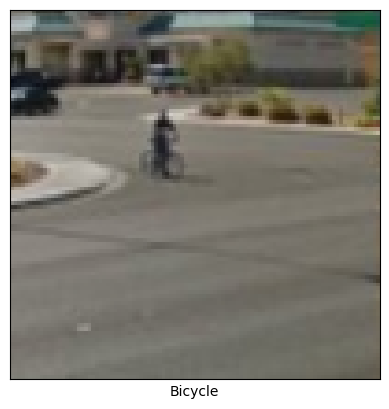

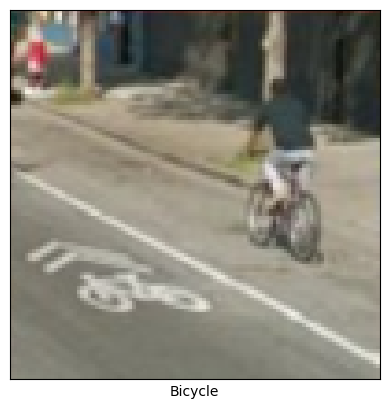

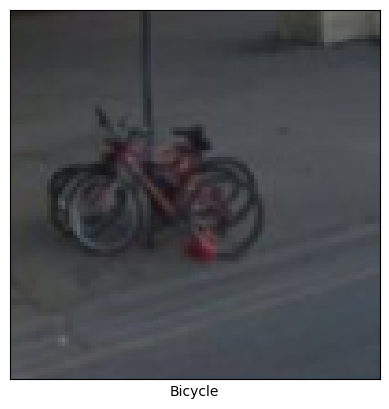

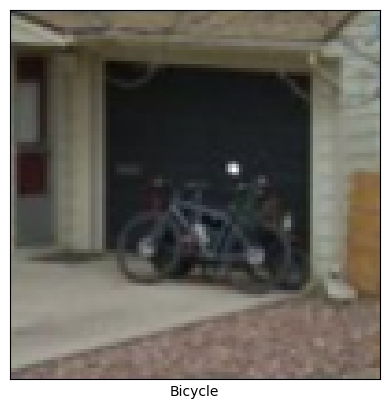

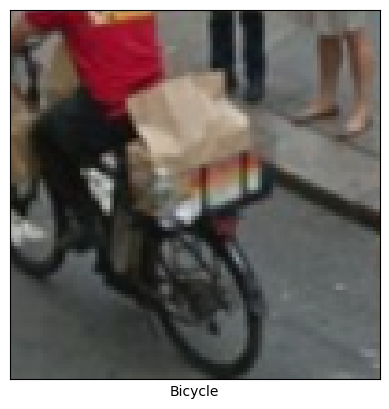

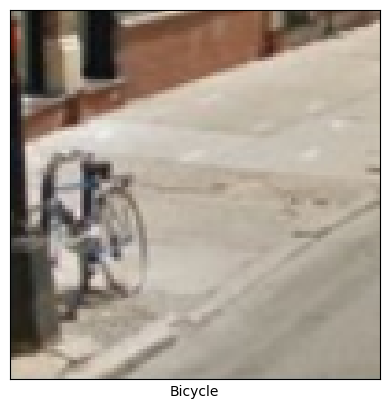

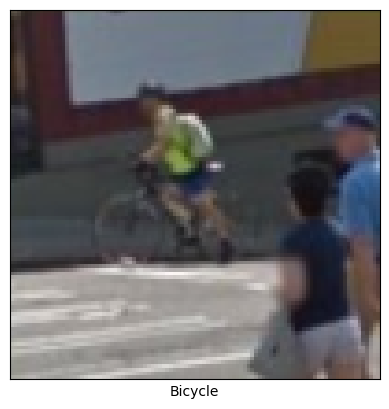

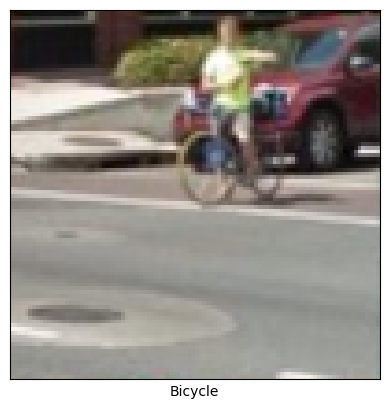

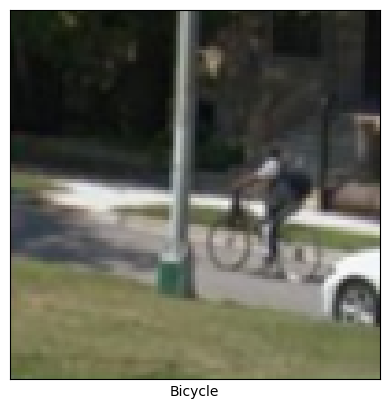

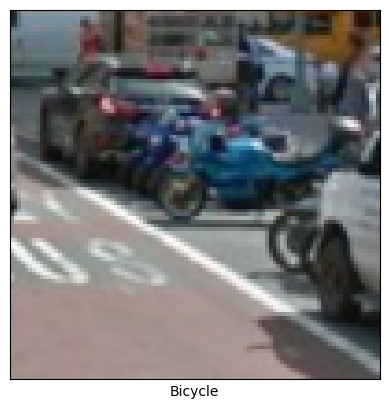

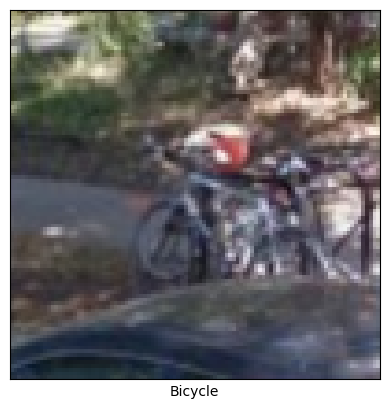

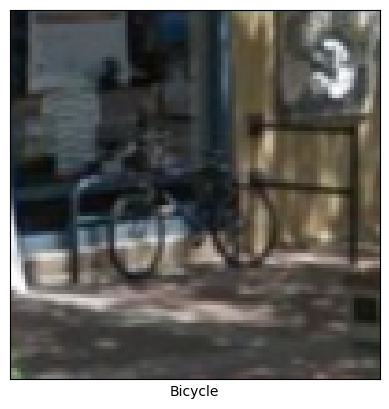

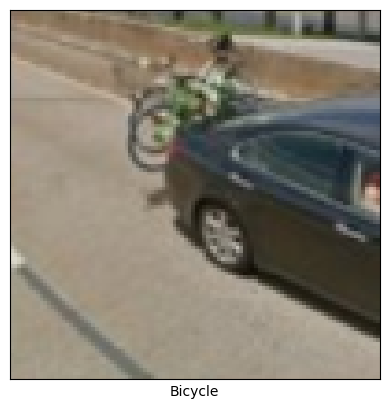

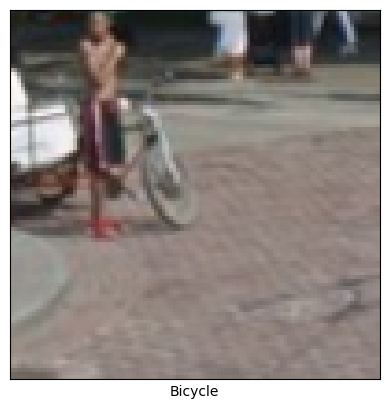

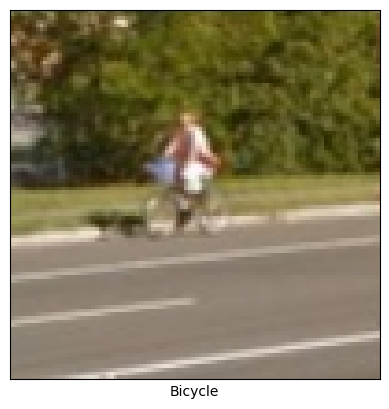

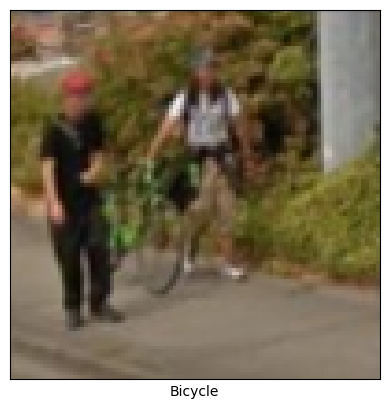

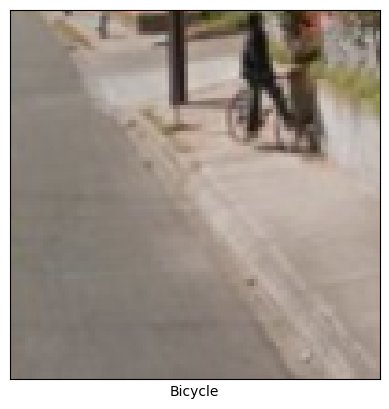

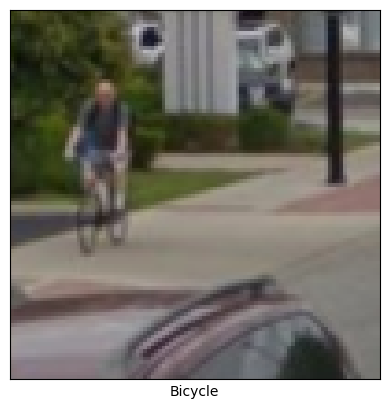

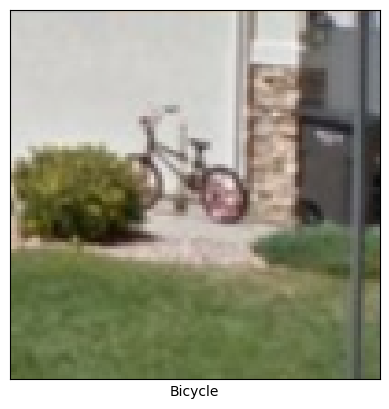

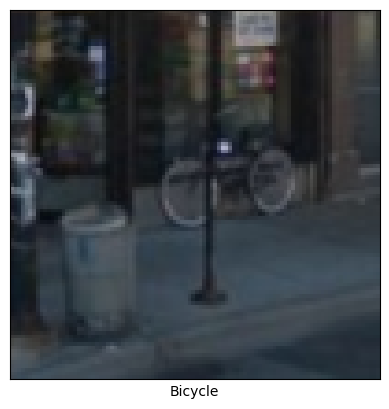

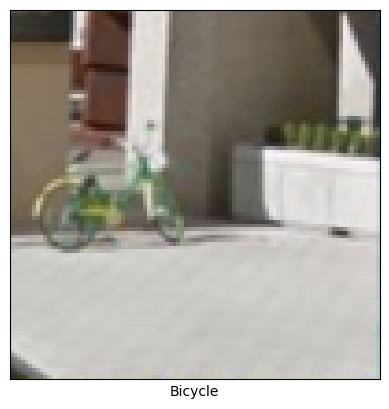

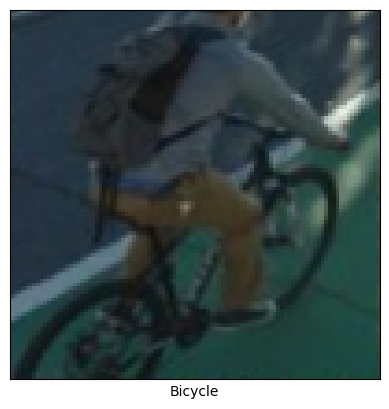

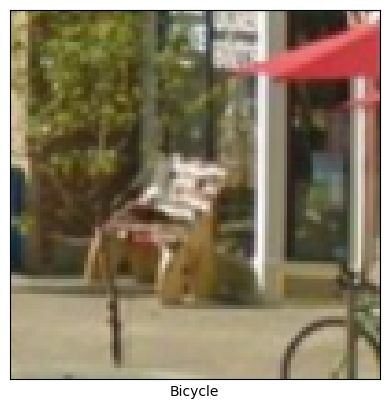

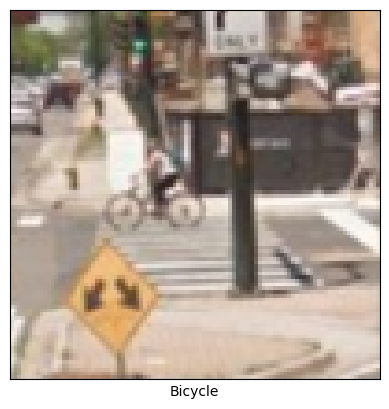

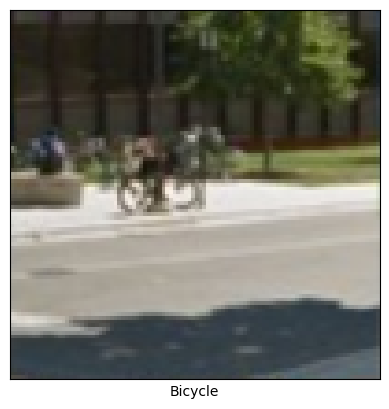

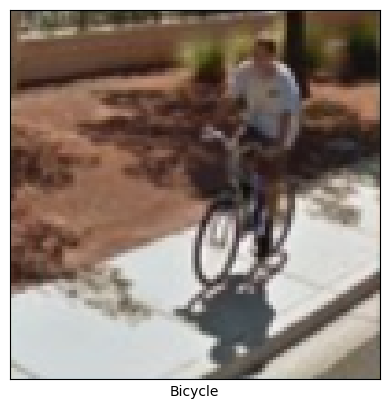

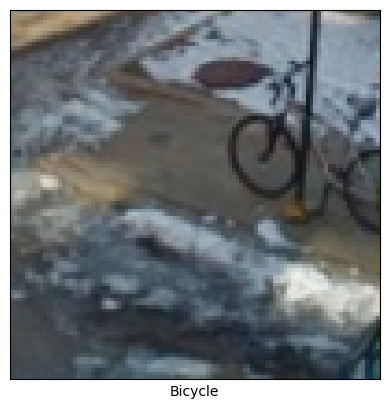

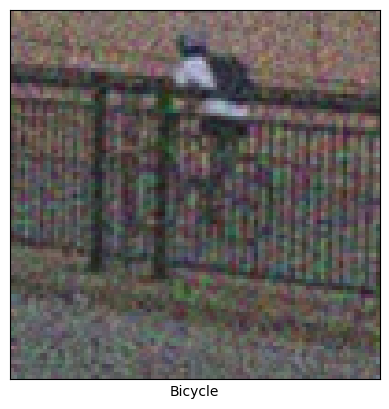

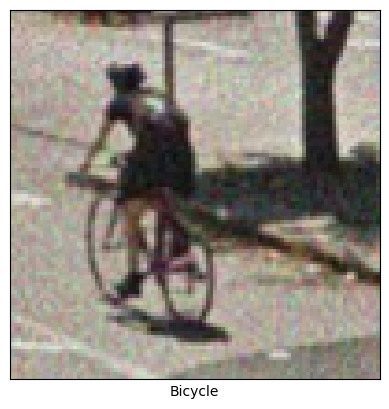

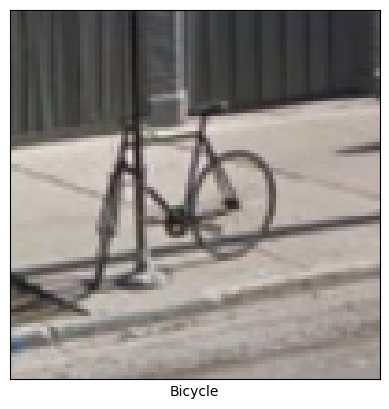

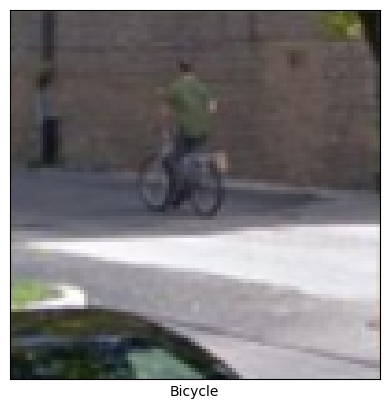

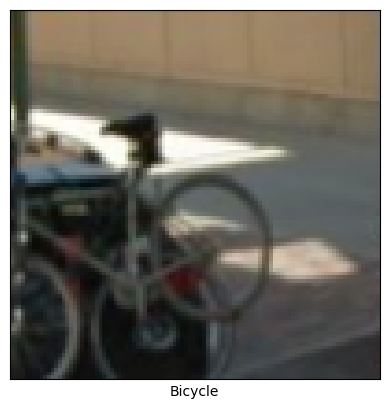

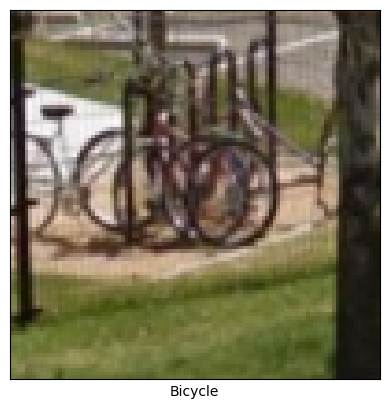

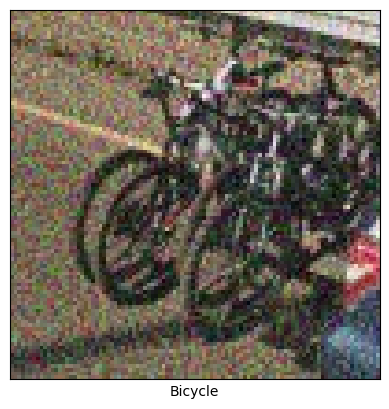

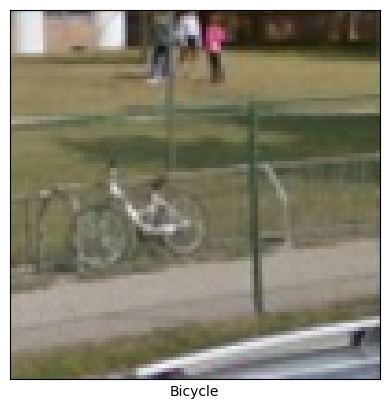

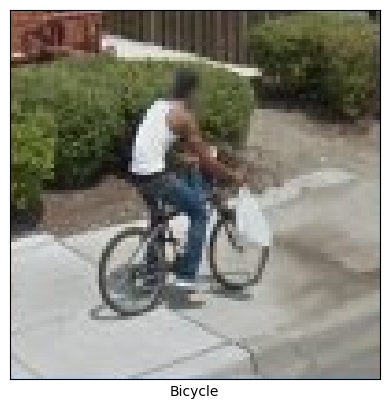

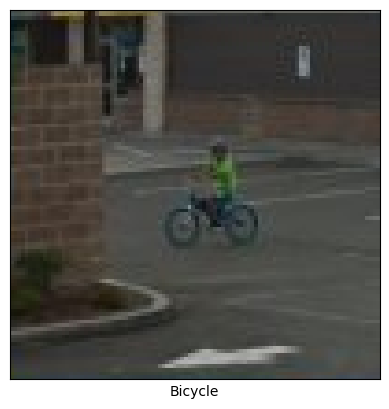

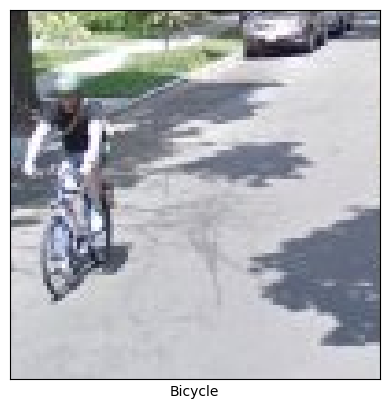

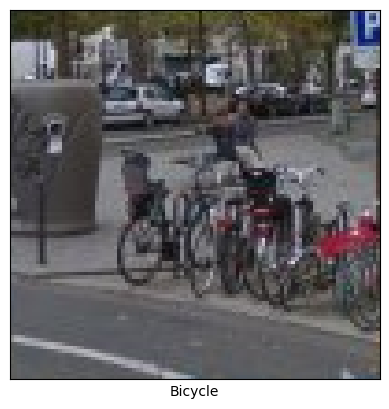

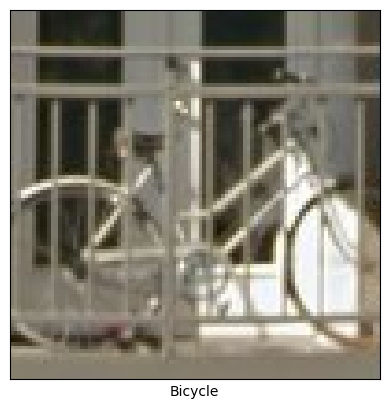

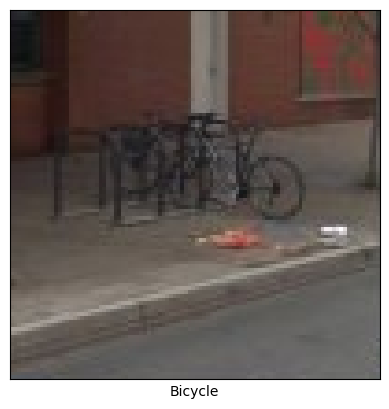

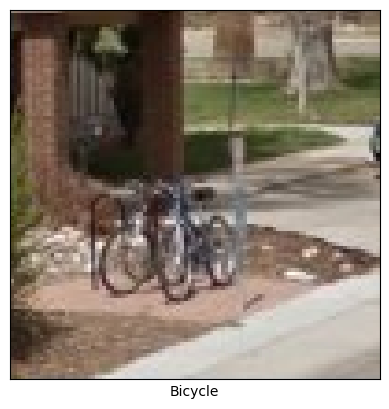

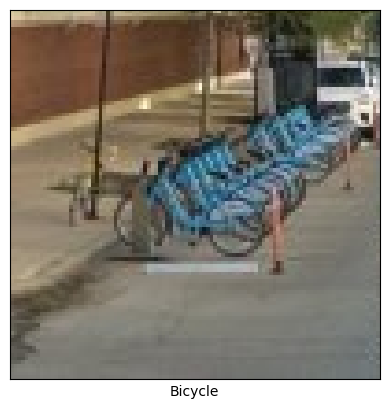

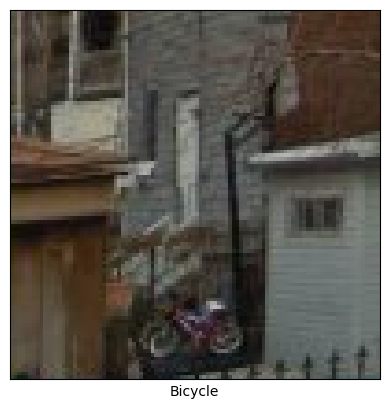

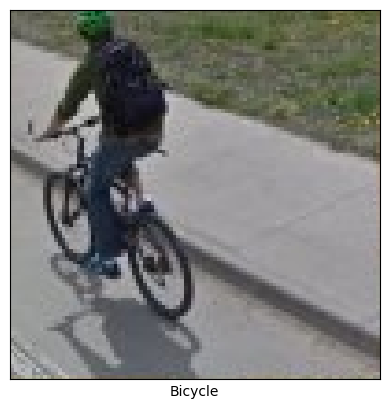

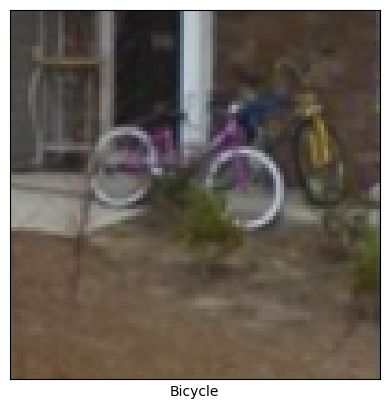

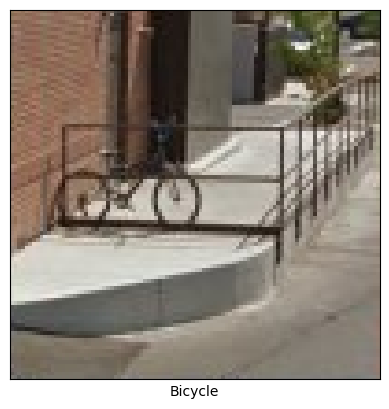

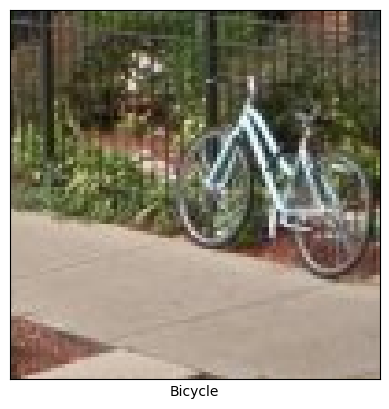

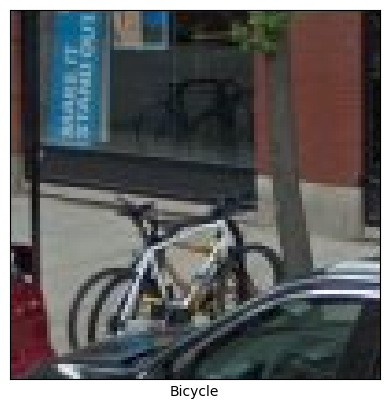

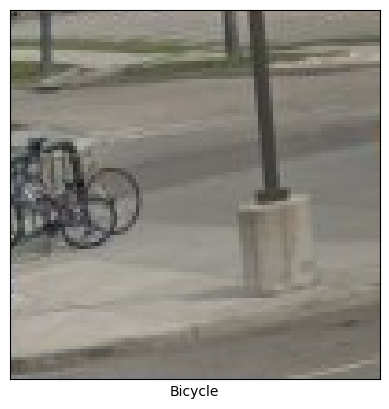

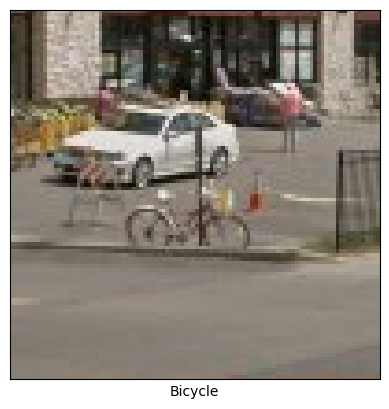

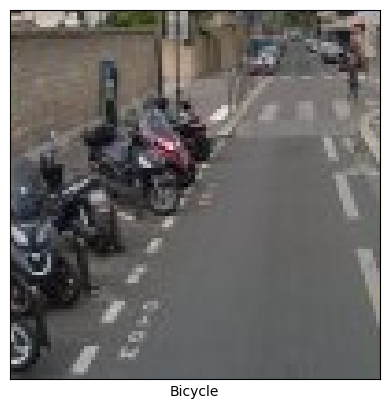

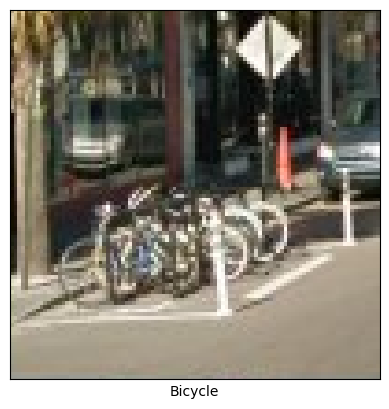

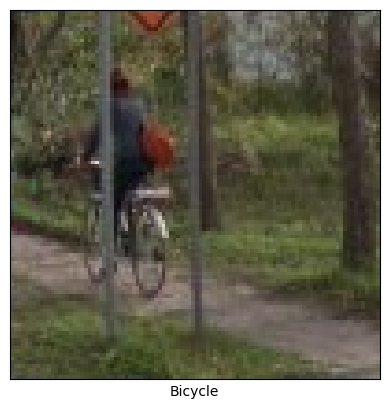

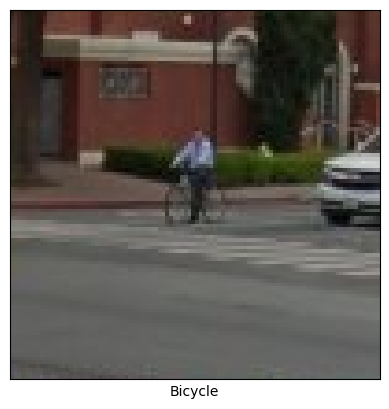

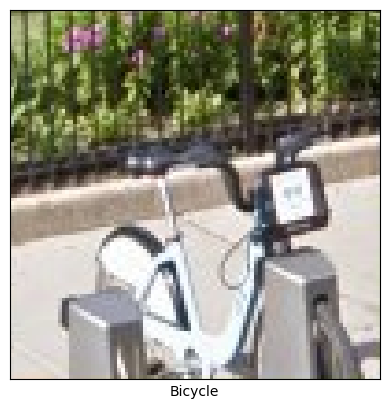

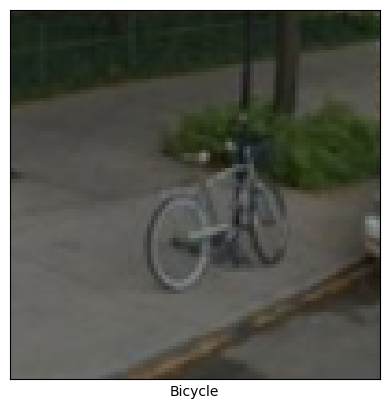

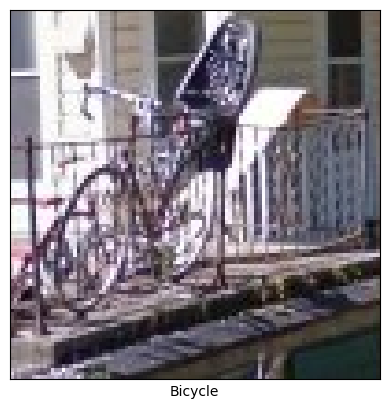

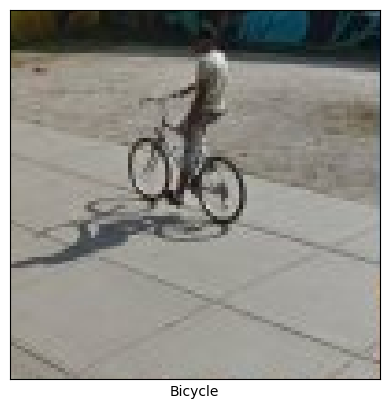

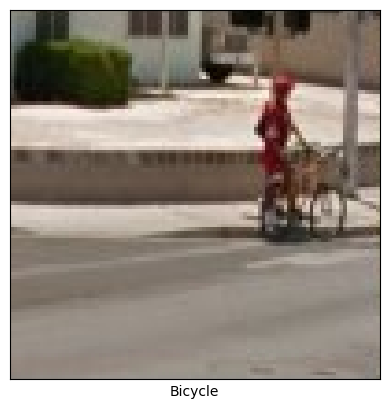

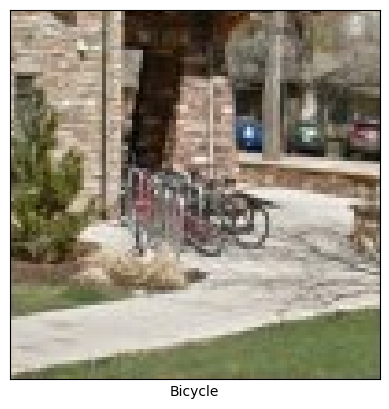

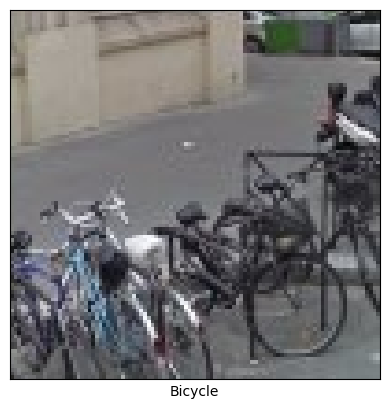

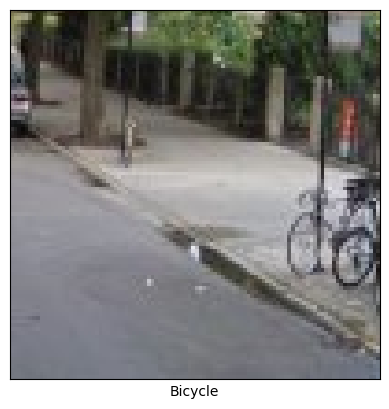

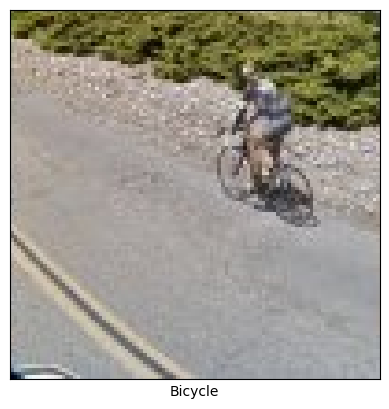

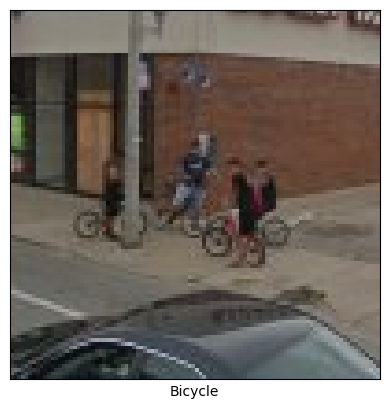

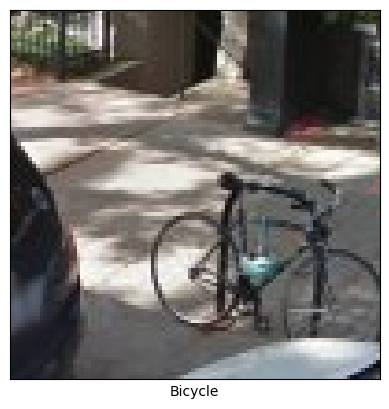

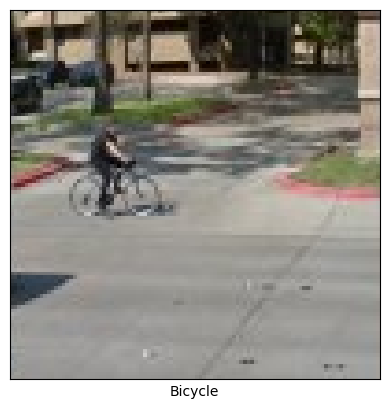

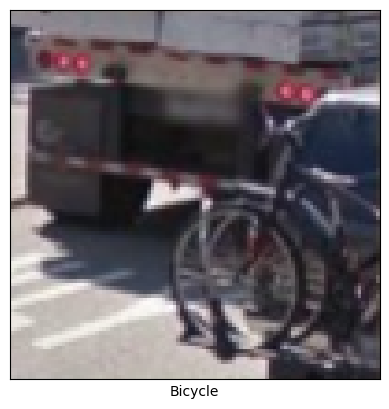

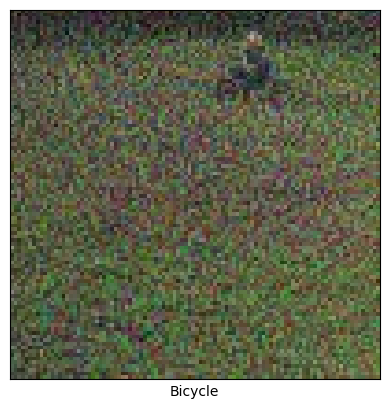

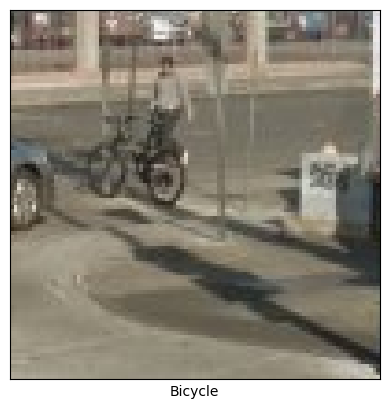

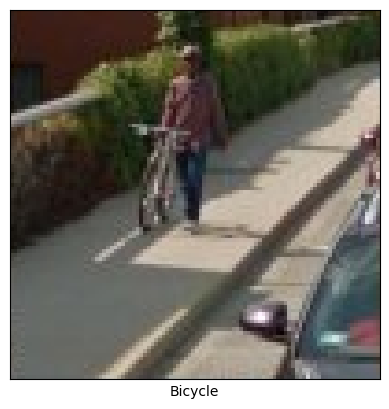

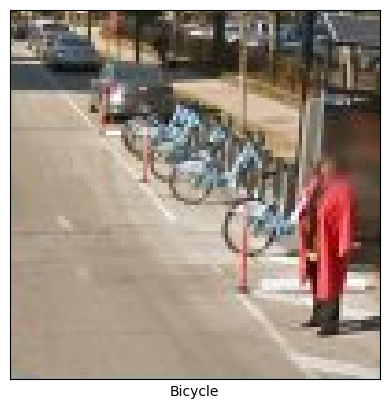

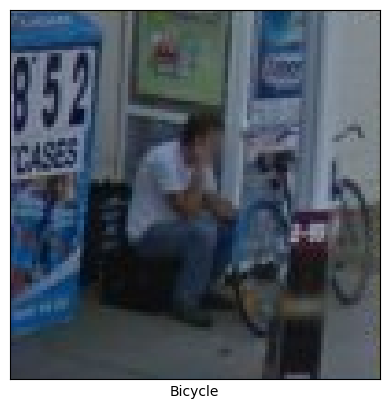

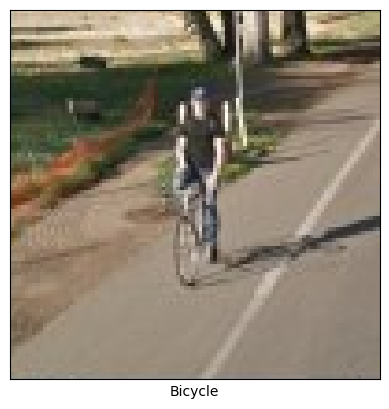

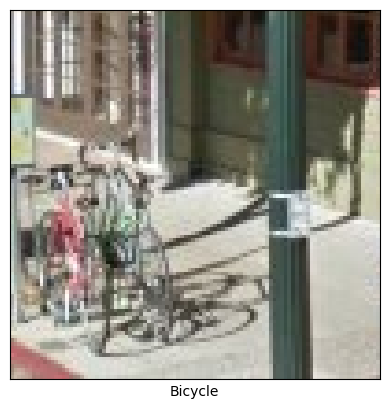

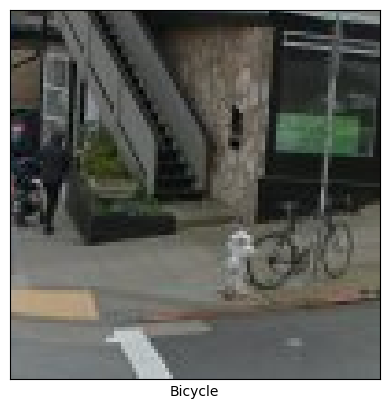

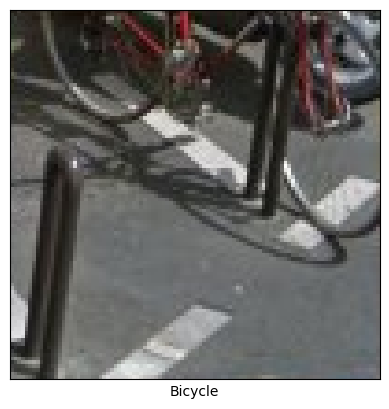

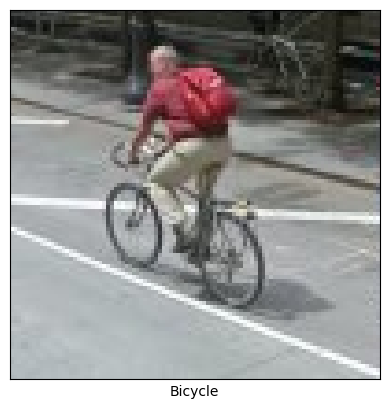

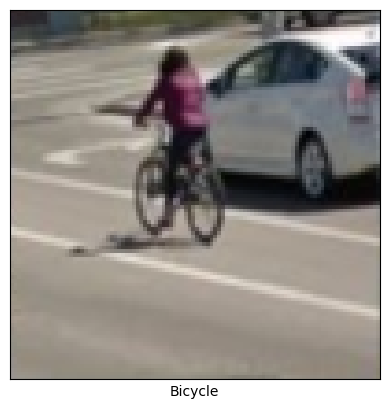

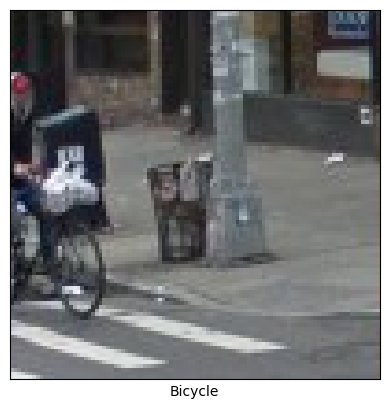

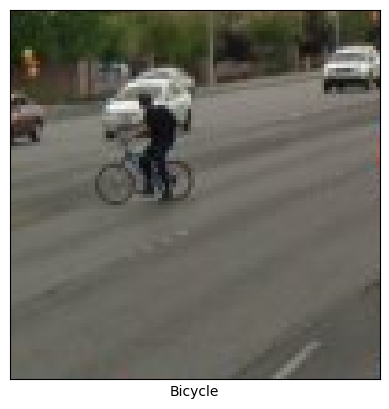

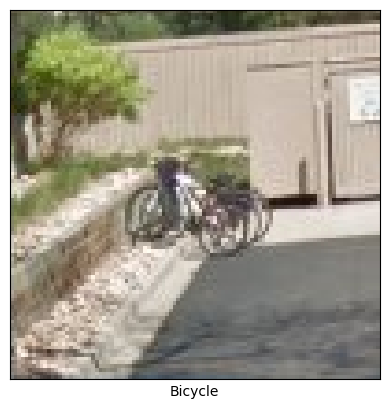

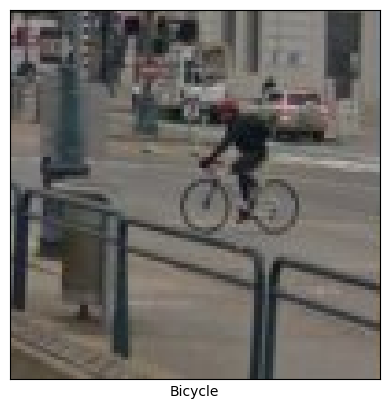

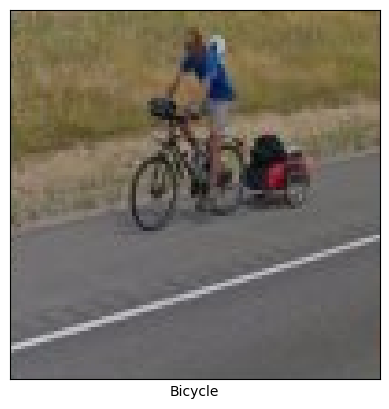

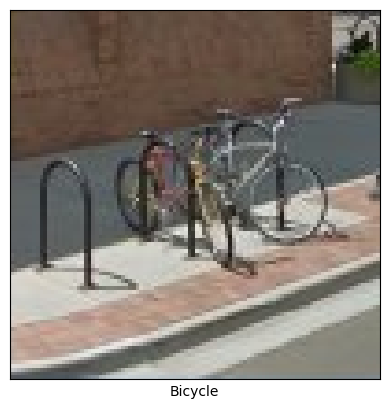

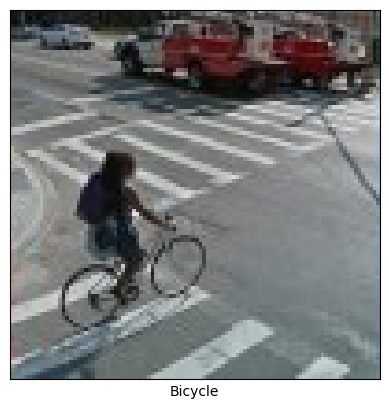

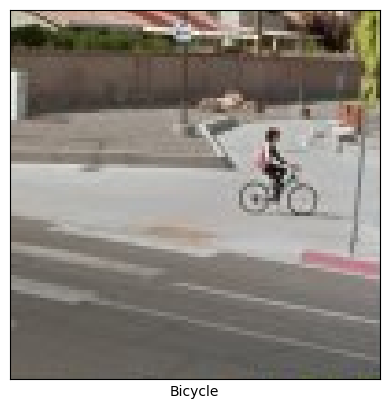

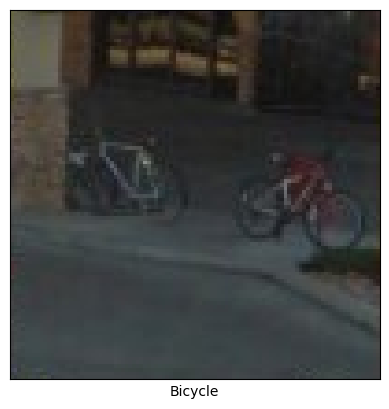

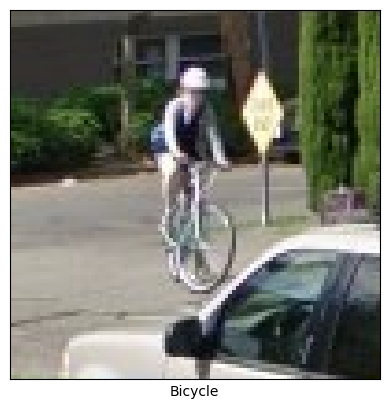

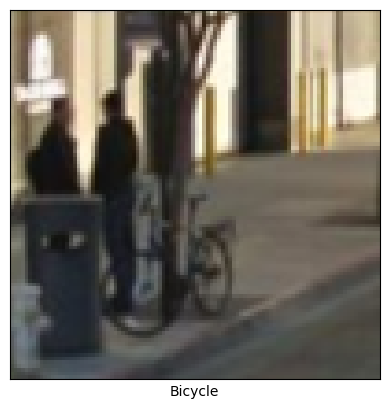

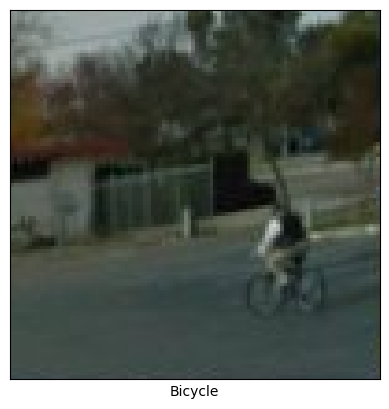

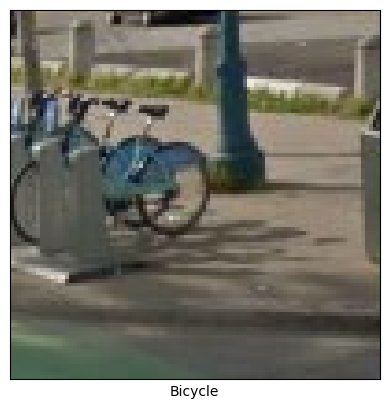

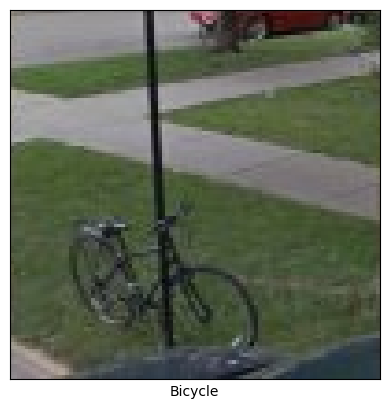

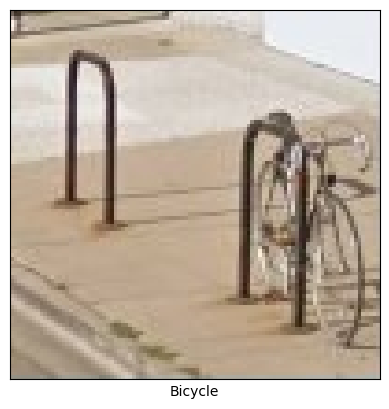

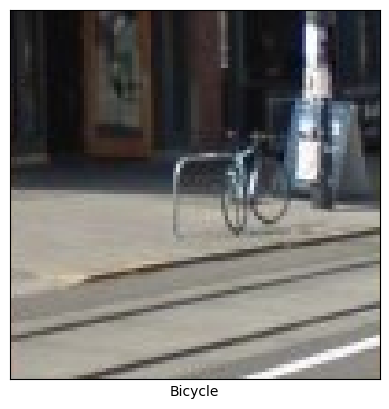

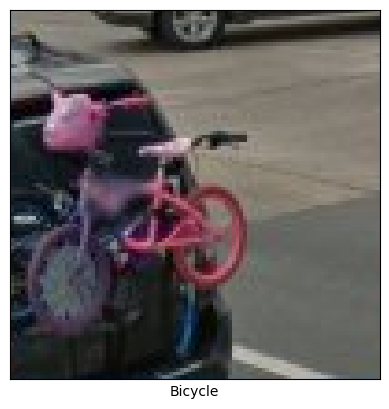

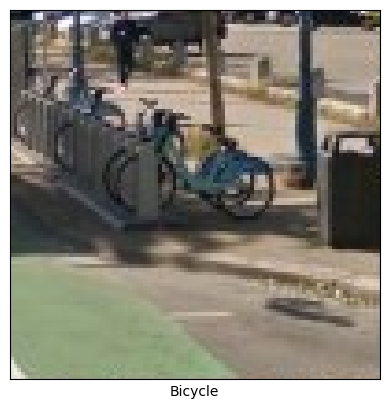

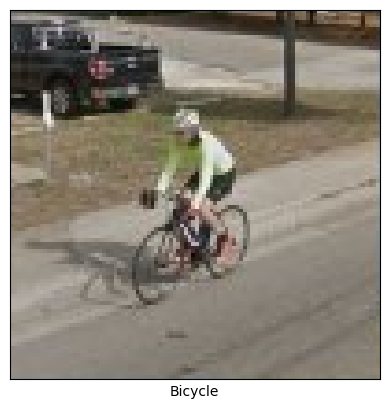

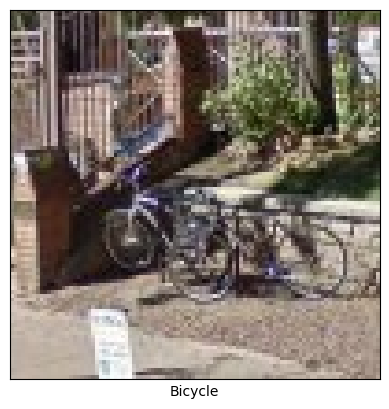

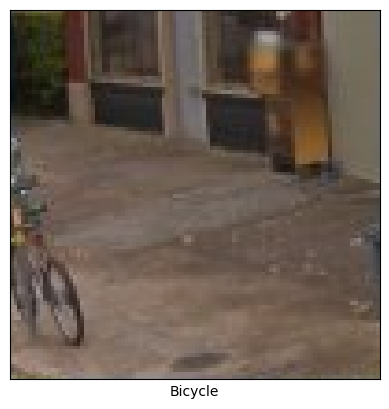

In [7]:
# Displaying the first 100 images
label_decoded = [label_names[i] for i in np.argmax(dataCat, axis=1)]
for i in range(100):
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(label_decoded[i])
    plt.imshow(dataImg[i])
    plt.show()